# Report 4

## Mafalda Borges

In [25]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint, EvalExponentialPdf, MakePoissonPmf, MakeMixture
import thinkplot

This next problem was taken from Allen Downey's notebook.

## World Cup Problem

In the 2014 FIFA World Cup, Germany played Brazil in a semifinal match. Germany scored after 11 minutes and again at the 23 minute mark. At that point in the match, how many goals would you expect Germany to score after 90 minutes? What was the probability that they would score 5 more goals (as, in fact, they did)?

Note: for this one you will need a new suite that provides a Likelihood function that takes as data the time between goals, rather than the number of goals in a game. 

I am going to assume that a Poisson process is a reasonable model to use for soccer games just like for hockey games, which assumes that goal scoring can be modeled by some fixed rate $\lambda $. This means probability of scoring a goal during any point in the game is the same.

Given the distribution is a Poisson process then the distribution of time between goals is exponential with $\lambda $ being the goal scoring rate. We know that the first goal was scored at 11 minutes and the next goal occured 12 minutes later. 

First I will create a class that inherits from Suite and creates a likelihood function.

In [3]:
class Soccer(Suite):
    """Hypotheses about goal scoring rates"""
    def Likelihood(self, data, hypo):
        """Likelihood of data under hypothesis
        hypo: goal rate in (goals/game)
        data: time between goals"""
        
        x = data
        lam = hypo/90.0
        like = EvalExponentialPdf(x, lam)
        return like

This is returns the likelihood of the data given that the data is the time between goals in minutes and hypo is the predicted goal scoring rate in goals per game. 

Now we need to construct a prior. The average number of goals scored per game for the tournament was 2.7. I am going to construct a uniform distribution and update it so it has a mean of 2.7 goals. 

Data from: https://www.statista.com/statistics/269031/goals-scored-per-game-at-the-fifa-world-cup-since-1930/

2.7252648918157445

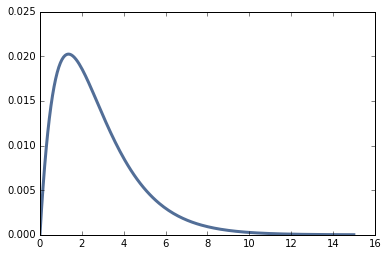

In [18]:
hypos = np.linspace(0, 15, 201)
suite = Soccer(hypos)
suite.Update(66)
thinkplot.Pdf(suite)
suite.Mean()

Now we can update our distribution with information from the actual game. The first goal was scored in 11 minutes, and the next goal game about 12 minutes later.

4.0420735012024362

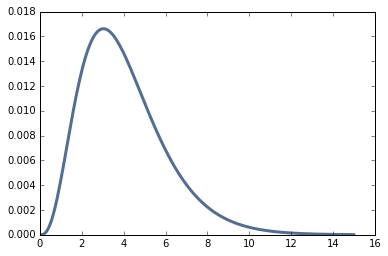

In [19]:
suite.Update(11)
suite.Update(12)
thinkplot.Pdf(suite)
suite.Mean()

Now my models believes that about 4 goals will be scored per game.

Now we have to predict how many goals will be scored in the remaining amount of time by Germany. We will use the posterior distribution of $\lambda$ to create a predictive distribution for the number of goals that will be scored in the remaining time.

In [26]:
def GoalsScored(suite, time_left):
    """Plots the predictive distribution for additional number of goals.

    suite: posterior distribution of lambda in goals per game
    time_left: how much of the game is left in minutes
    """
    metapmf = Pmf()
    for lam, prob in suite.Items():
        lt = lam * time_left / 90
        pred = MakePoissonPmf(lt, 15)
        metapmf[pred] = prob
        #thinkplot.Pdf(pred, color='gray', alpha=0.3, linewidth=0.5)

    mix = MakeMixture(metapmf)
    return mix

mix = GoalsScored(suite, 90-23)

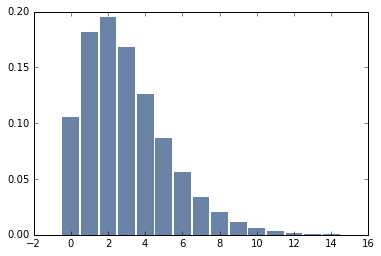

In [27]:
thinkplot.Hist(mix)


In [28]:
mix.ProbGreater(4)

0.2224156339145239

In [29]:
mix.Mean()

3.0070627149748601

My model predicts a 22% chance of scoring 5 or more times which seems unreasonably high for a soccer game. 